# Machine Learning: Examen 1
Clustering methods and principal component analysis

By: Enrique Mena Camilo


In [1]:
import importlib

import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from utils import eda, dimensionality_reduction, clustering, visualization

pd.set_option('display.max_columns', None)


Paths

In [2]:
DATA_PATH = "../data/"
FIGURES_PATH = "./figures/"


Data loading

In [3]:
data = pd.read_csv(DATA_PATH + "bodyPerformance.csv")
print(f"Total instances: {data.shape[0]}")
print(f"Total features: {data.shape[1]}")
data.head(10)


Total instances: 13393
Total features: 12


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


Rename some columns for easier access

In [4]:
data = data.rename(columns={
    "body fat_%": "body_fat_pct",
    "gripForce": "grip_force",
    "sit and bend forward_cm": "sit_and_bend_forward_cm",
    "sit-ups counts": "sit_ups_counts",
    "broad jump_cm": "broad_jump_cm",
})
data.head(10)


,age,gender,height_cm,weight_kg,body_fat_pct,diastolic,systolic,grip_force,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


# Exploratory Data Analysis

## The dataset has NaN values?

In [5]:
eda.get_nan_count(data)


,nan_count,nan_percentage
age,0,0.0
gender,0,0.0
height_cm,0,0.0
weight_kg,0,0.0
body_fat_pct,0,0.0
diastolic,0,0.0
systolic,0,0.0
grip_force,0,0.0
sit_and_bend_forward_cm,0,0.0
sit_ups_counts,0,0.0


_R: No, the dataset is complete_

## What about the data types?

In [6]:
data.dtypes


age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body_fat_pct               float64
diastolic                  float64
systolic                   float64
grip_force                 float64
sit_and_bend_forward_cm    float64
sit_ups_counts             float64
broad_jump_cm              float64
class                       object
dtype: object

_R: It's needed to code the columns 'gender' and 'class'_

In [7]:
eda.code_categorical(data, "gender")
eda.code_categorical(data, "class")
data.head(10)


,age,gender,height_cm,weight_kg,body_fat_pct,diastolic,systolic,grip_force,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
5,36.0,0,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,1
6,42.0,0,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,3
7,33.0,1,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,1
8,54.0,1,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,2
9,28.0,1,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,1


## What about the distribution of the data?

### Original distributions

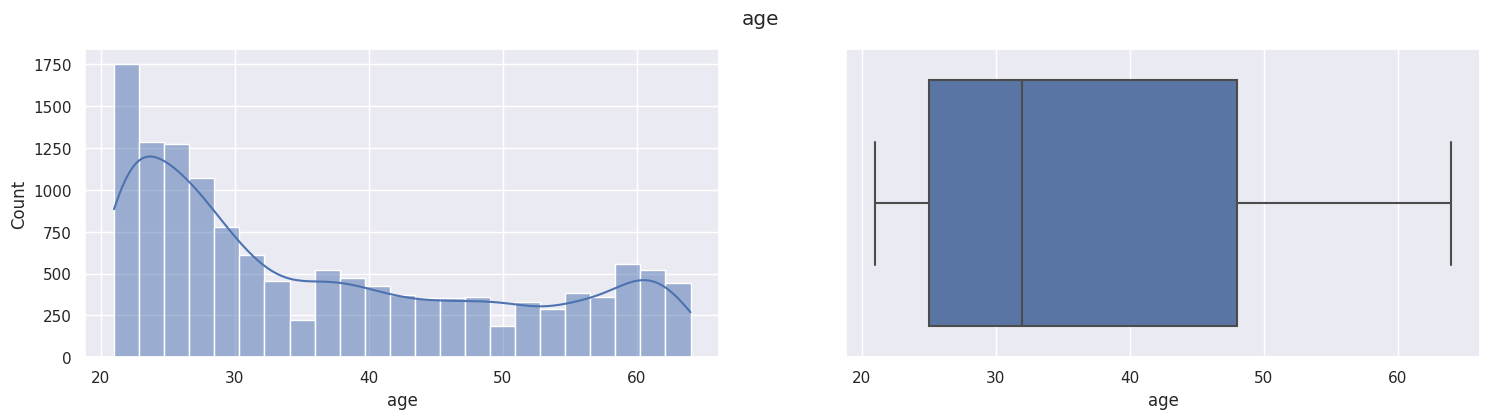

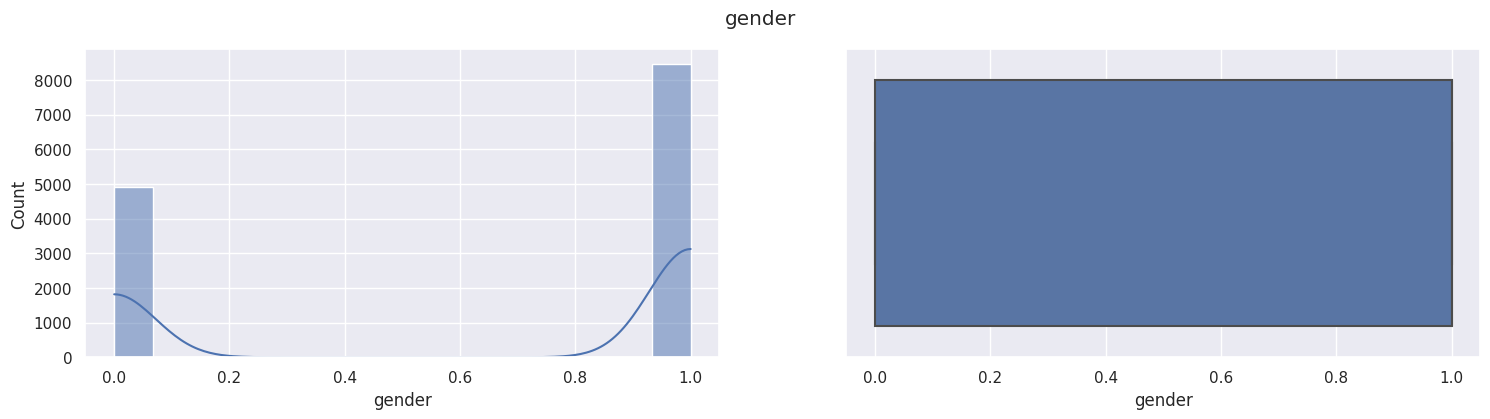

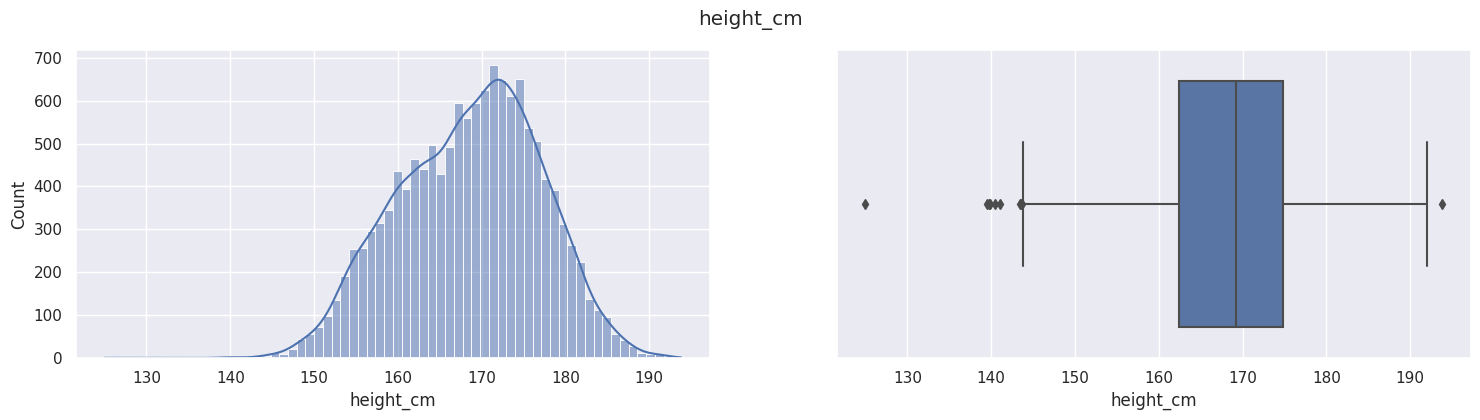

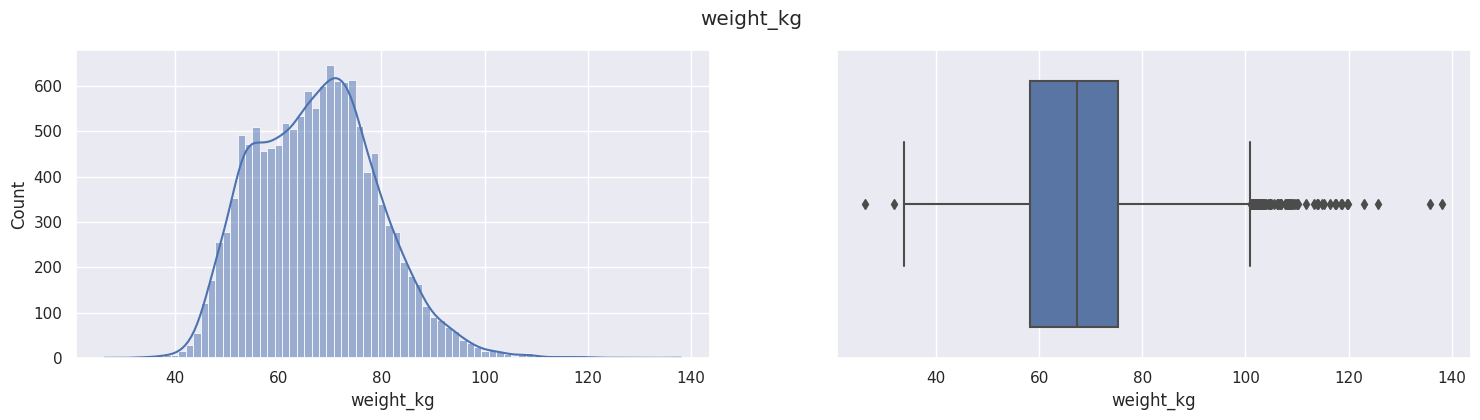

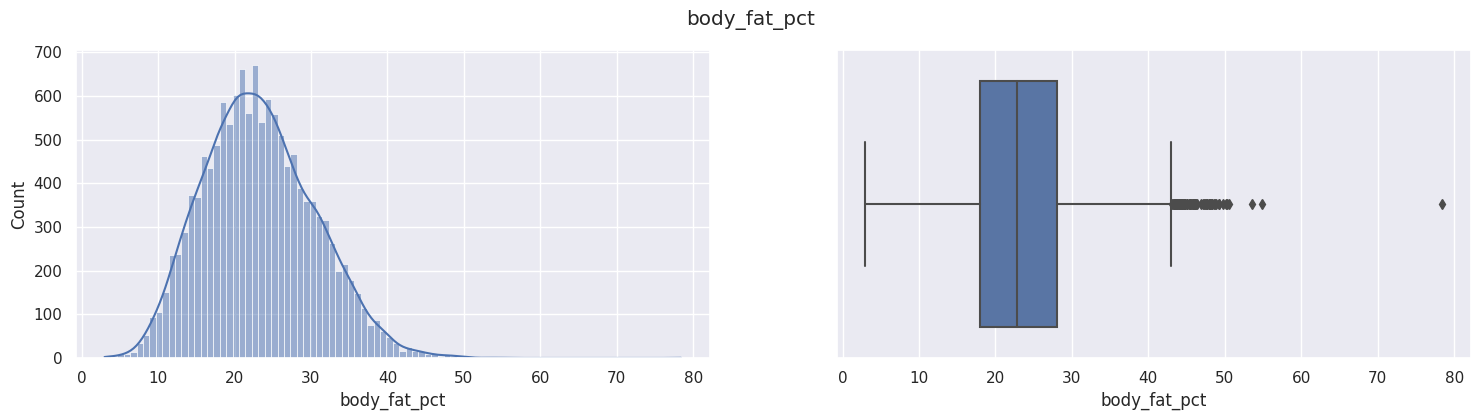

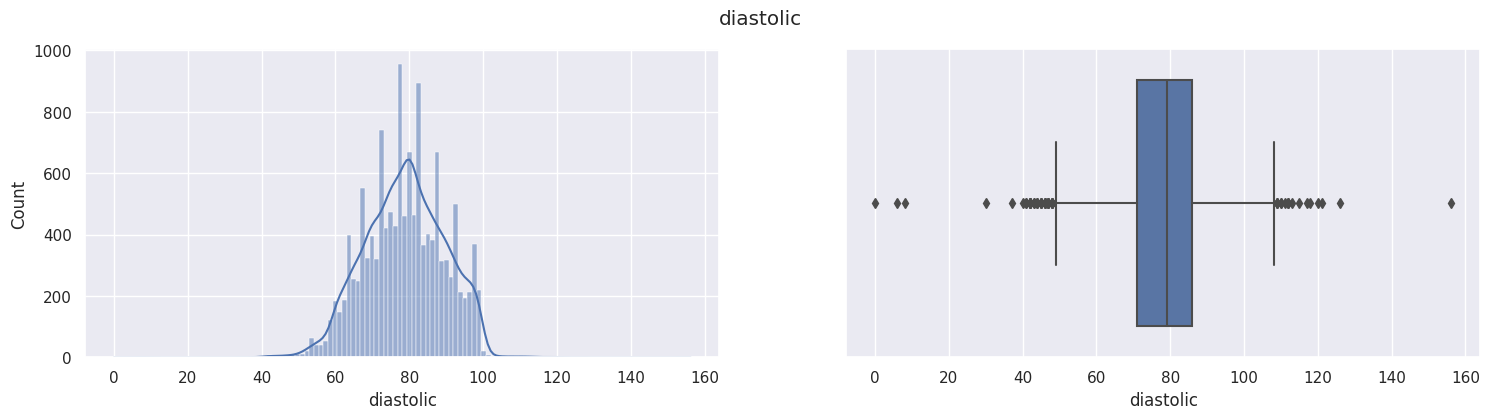

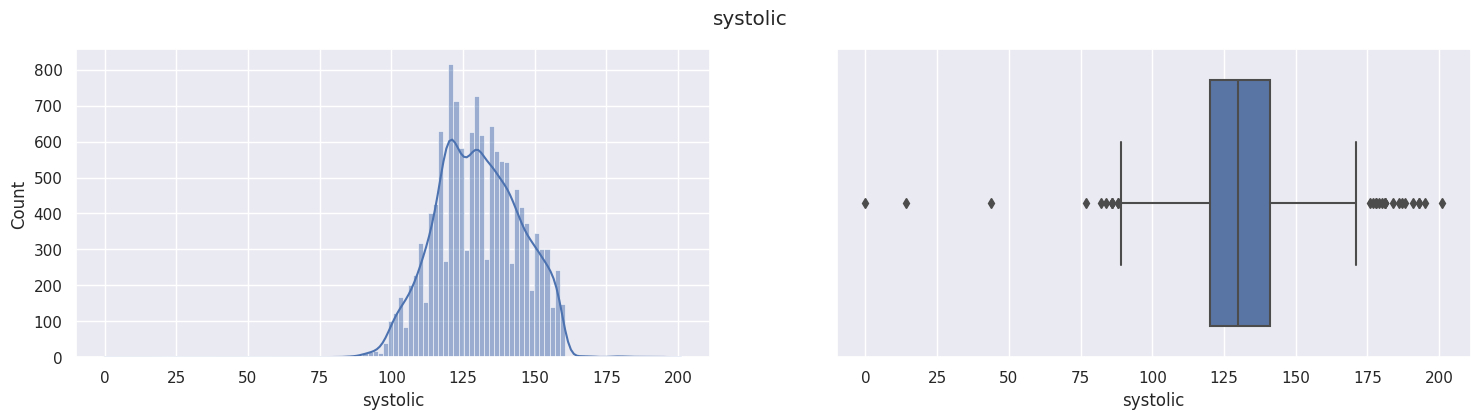

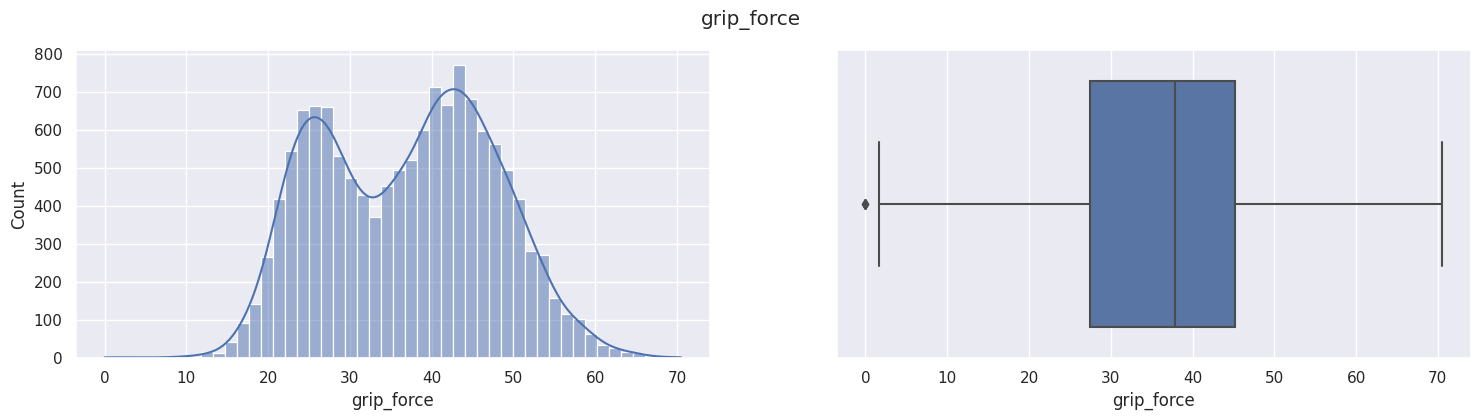

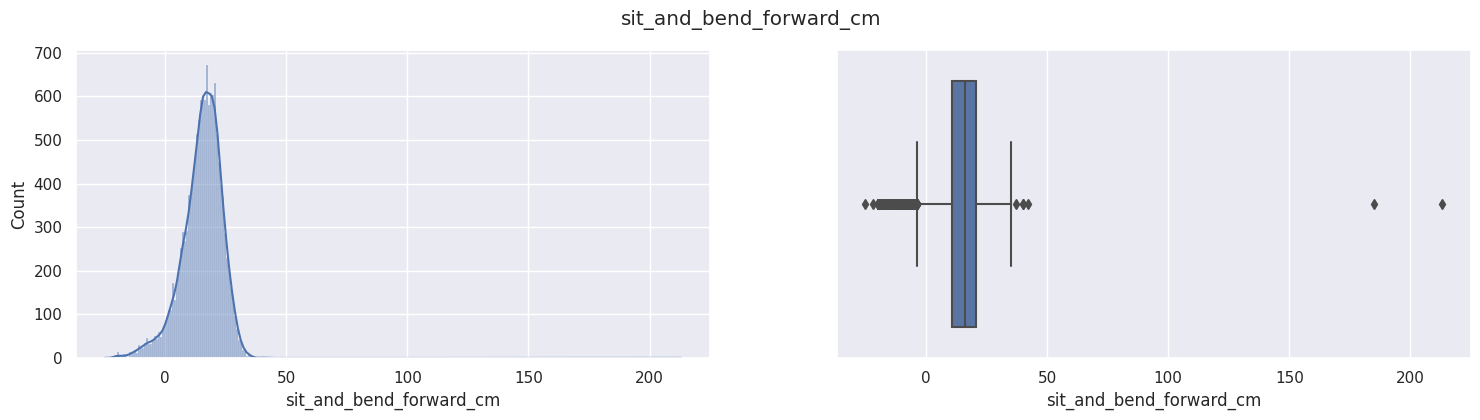

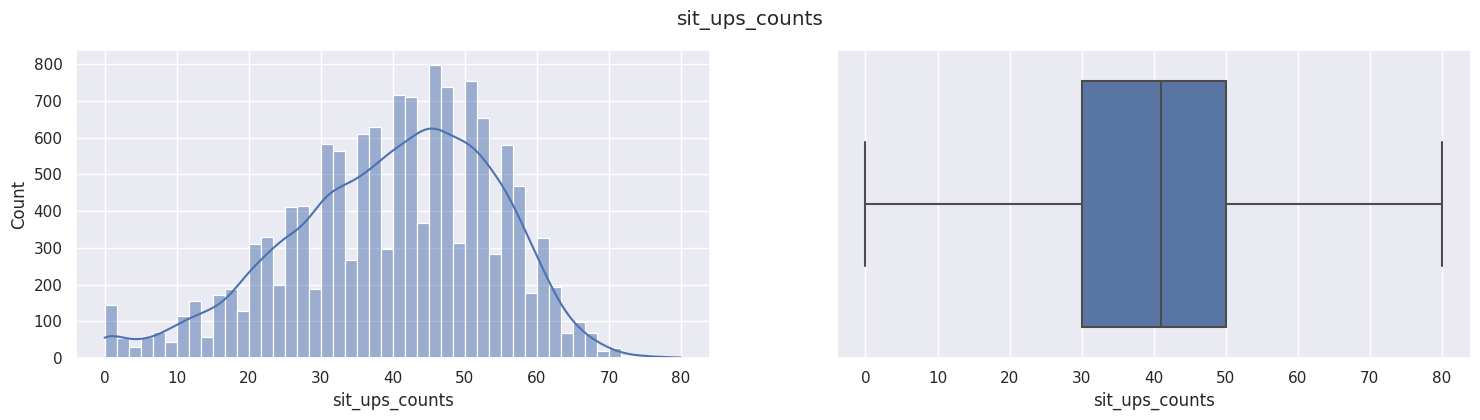

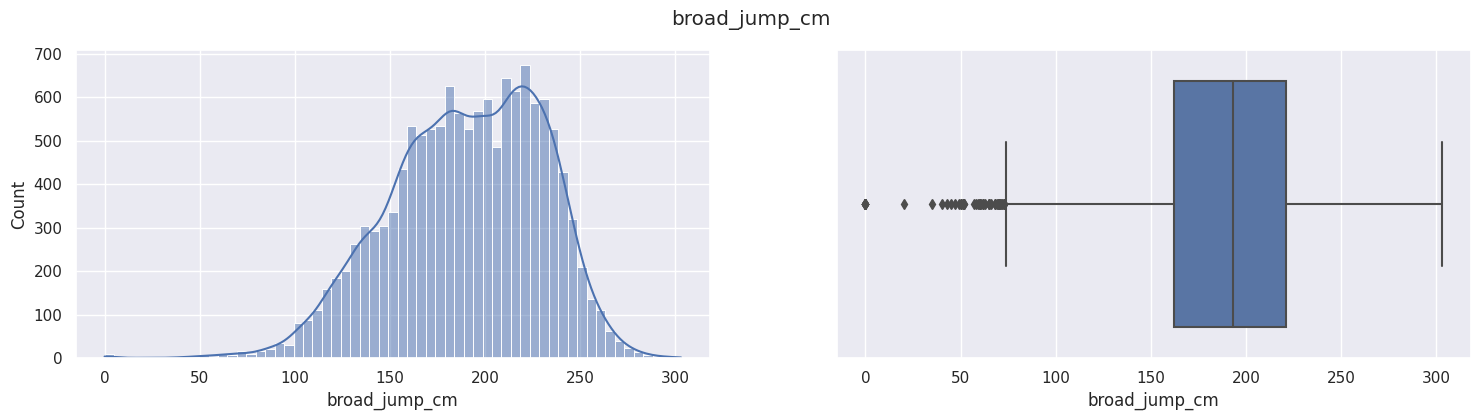

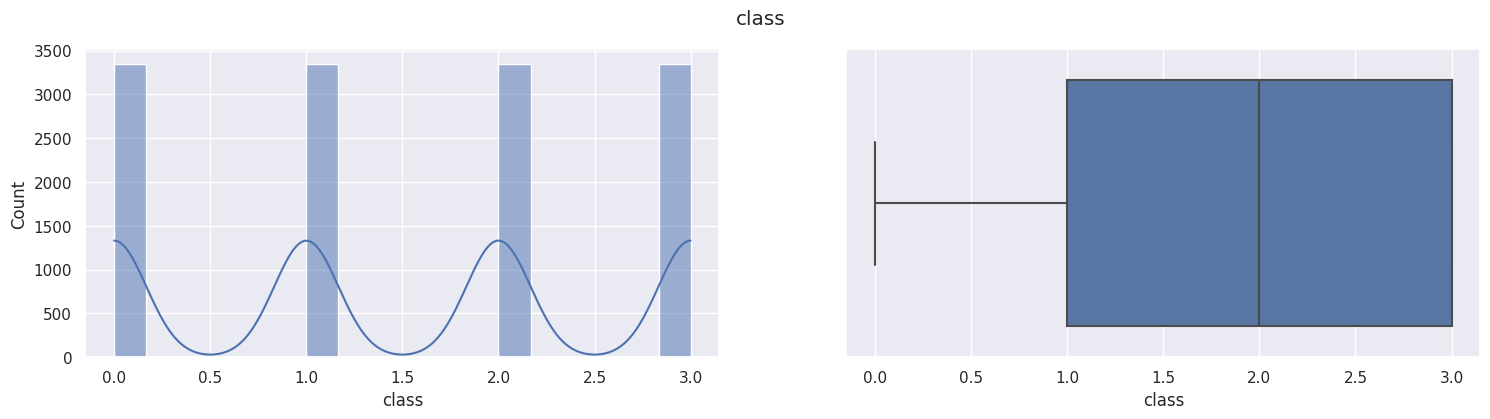

In [8]:
for column in data.columns.tolist():
    eda.plot_distribution(data, column, figures_path=FIGURES_PATH)
    

_R: Most of the features present a distribution close to the normal distribution. Standard scaler will be used for these features_


In [9]:
data_norm = data.copy()


In [10]:
features = ["height_cm", "weight_kg", "body_fat_pct", "diastolic", "systolic",
            "grip_force", "sit_and_bend_forward_cm", "sit_ups_counts","broad_jump_cm"]
for feature in features:
    data_norm[feature] = StandardScaler().fit_transform(data_norm[[feature]])
    

_R: Age will be scaled using the min max method, this to ensure that the clustering algorithm has comparable ranges between all attributes_

In [11]:
data_norm["age"] = MinMaxScaler().fit_transform(data_norm[["age"]])


### Scaled distributions

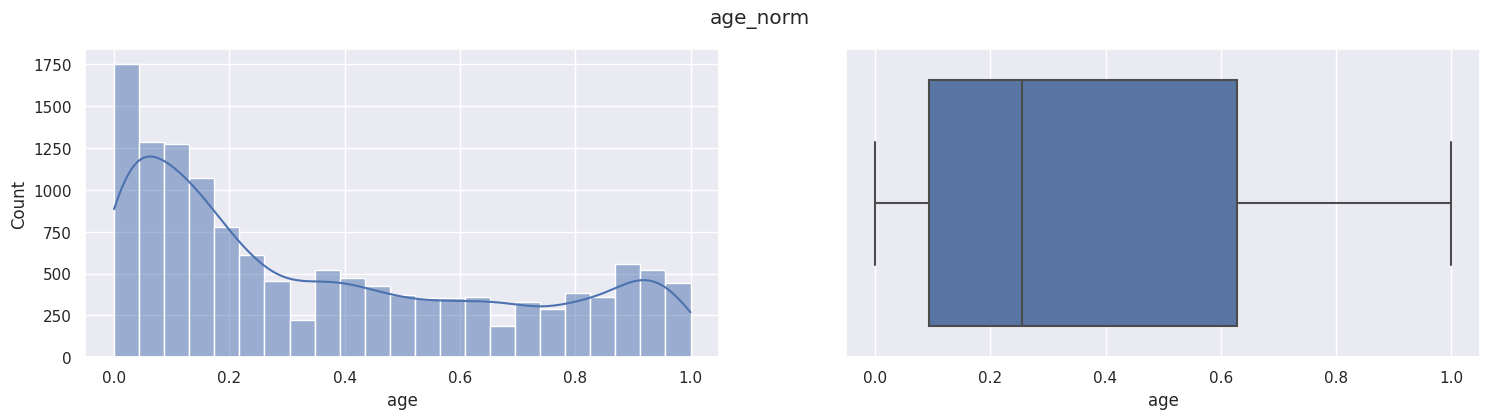

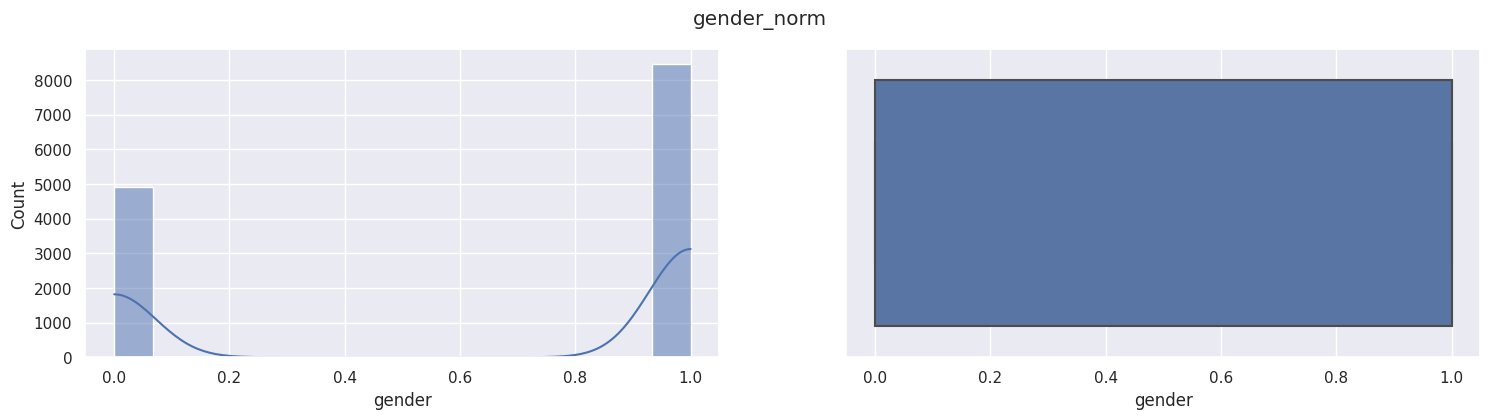

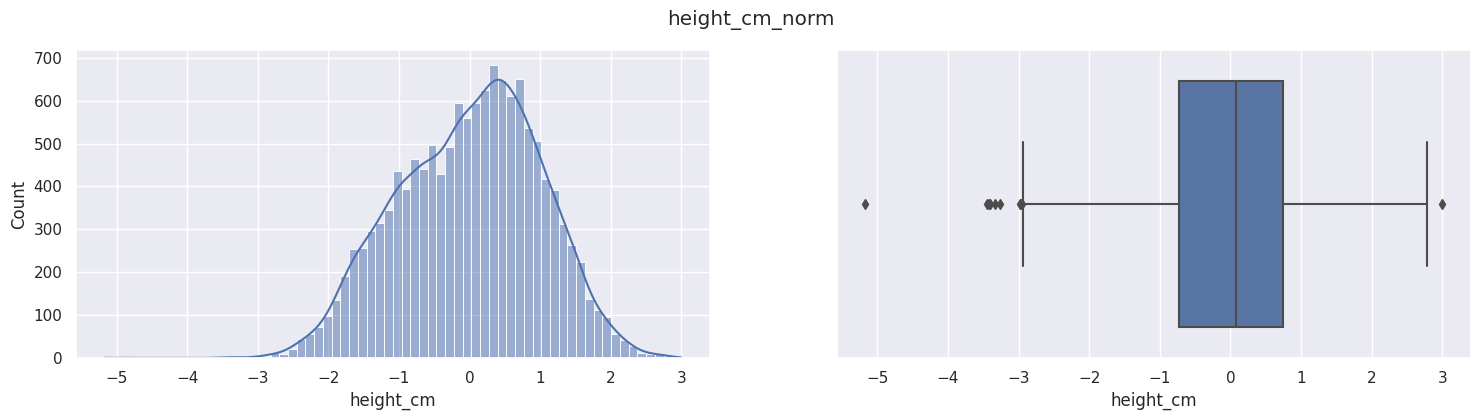

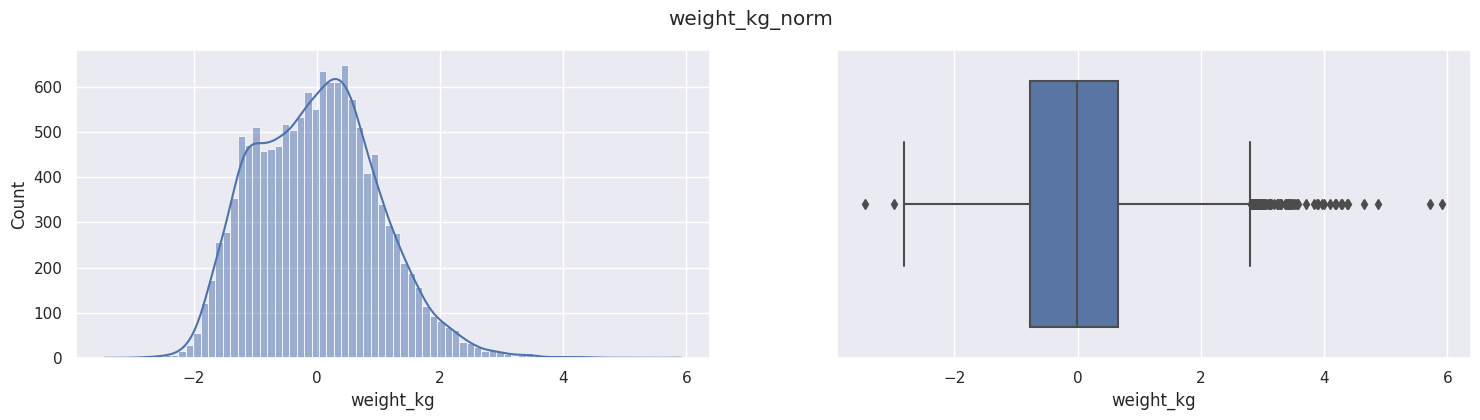

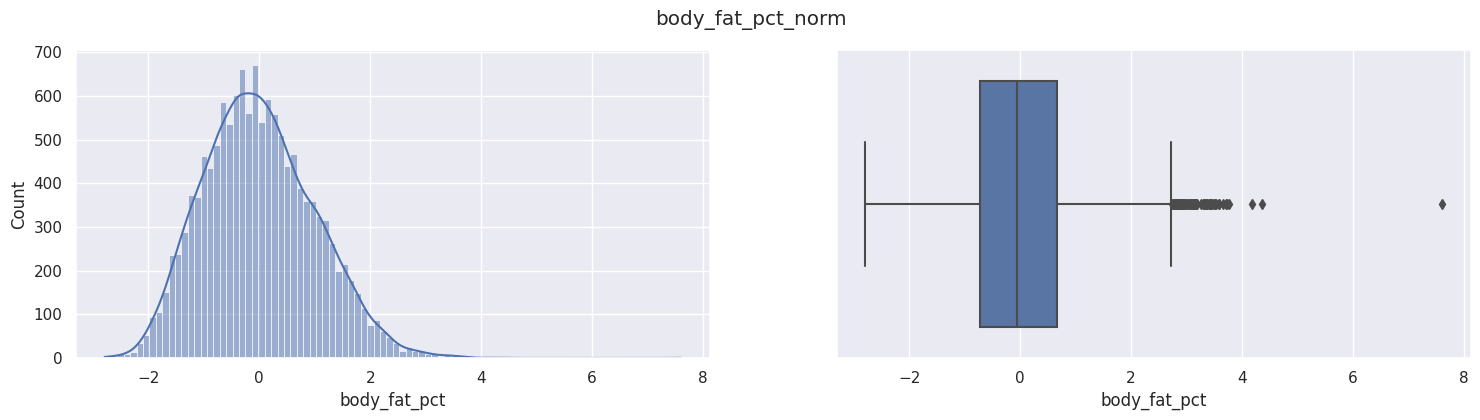

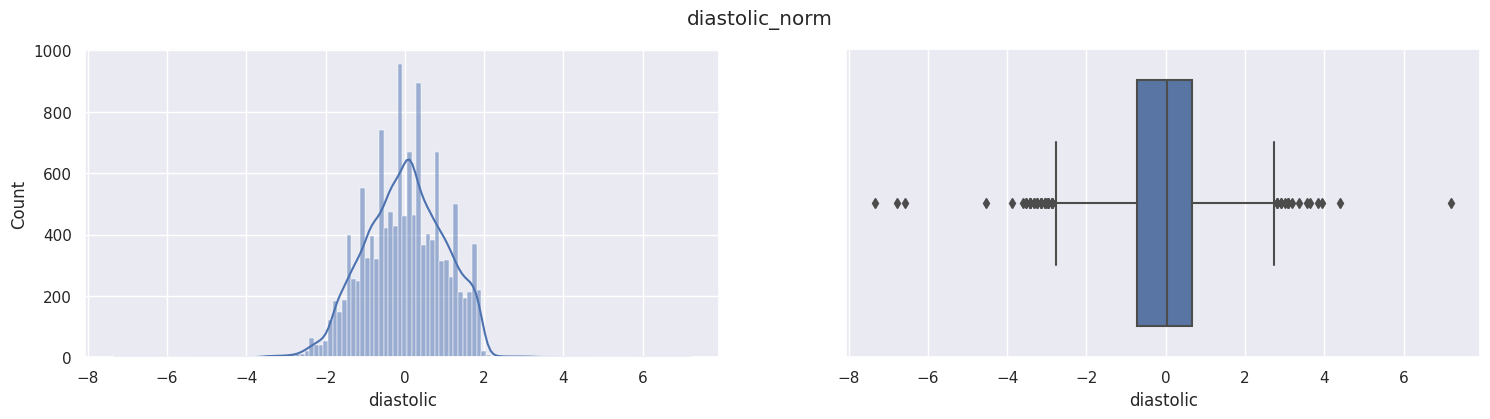

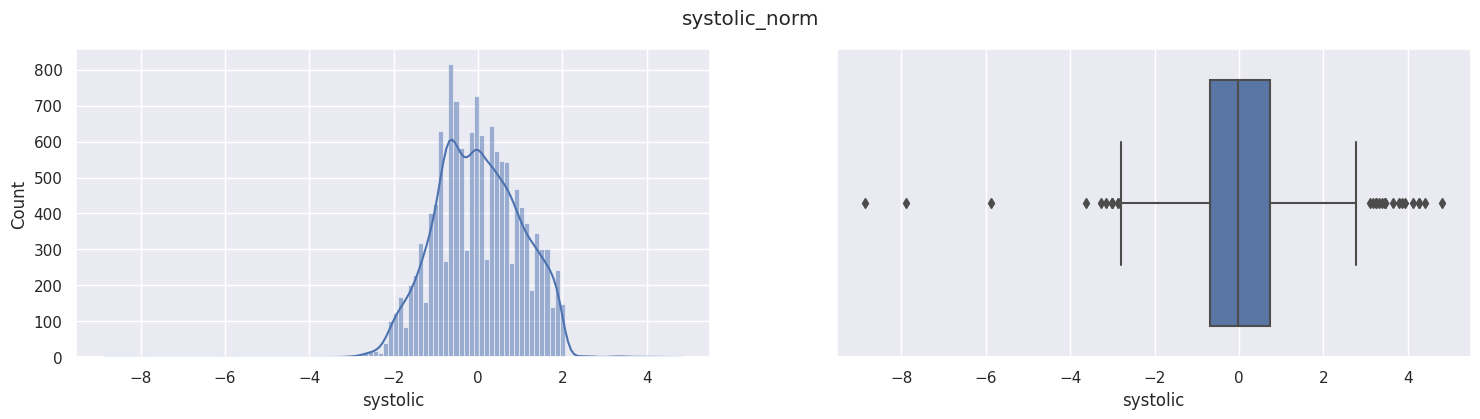

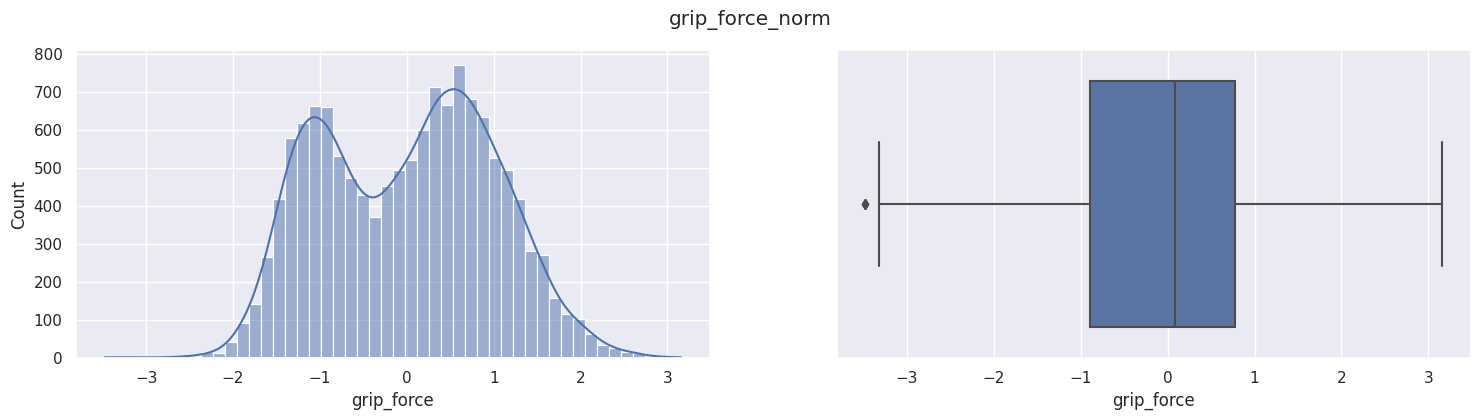

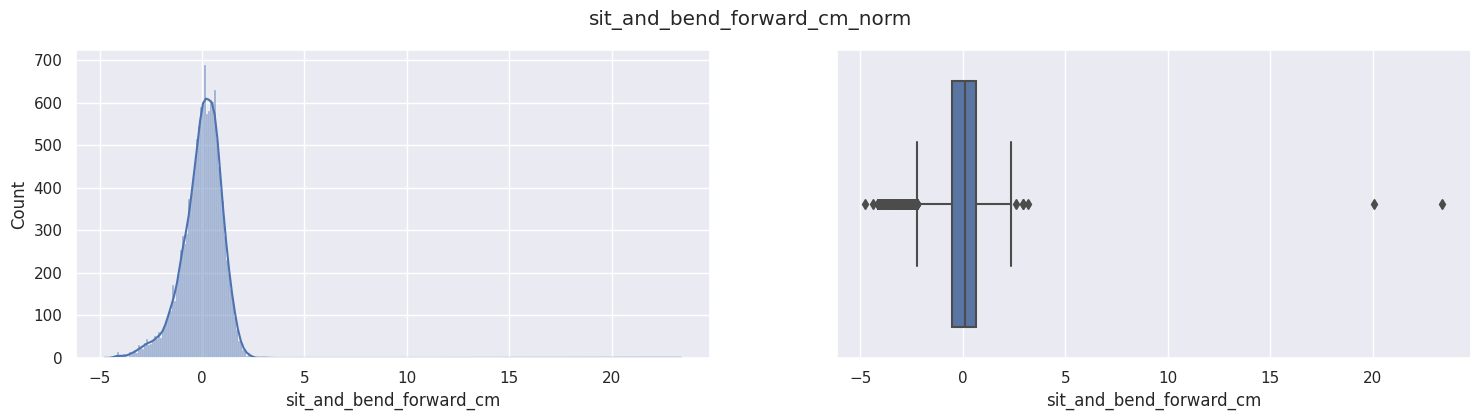

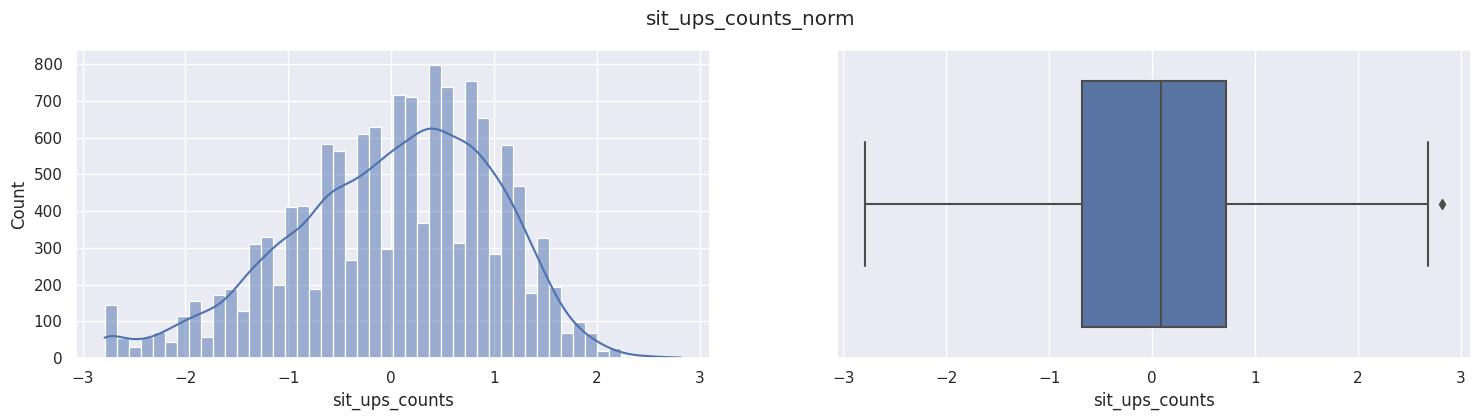

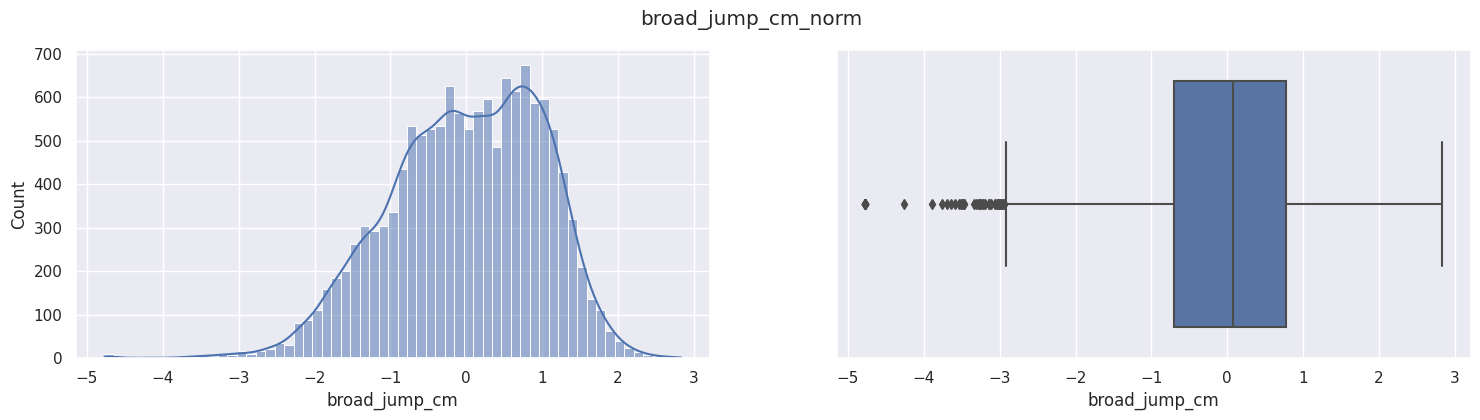

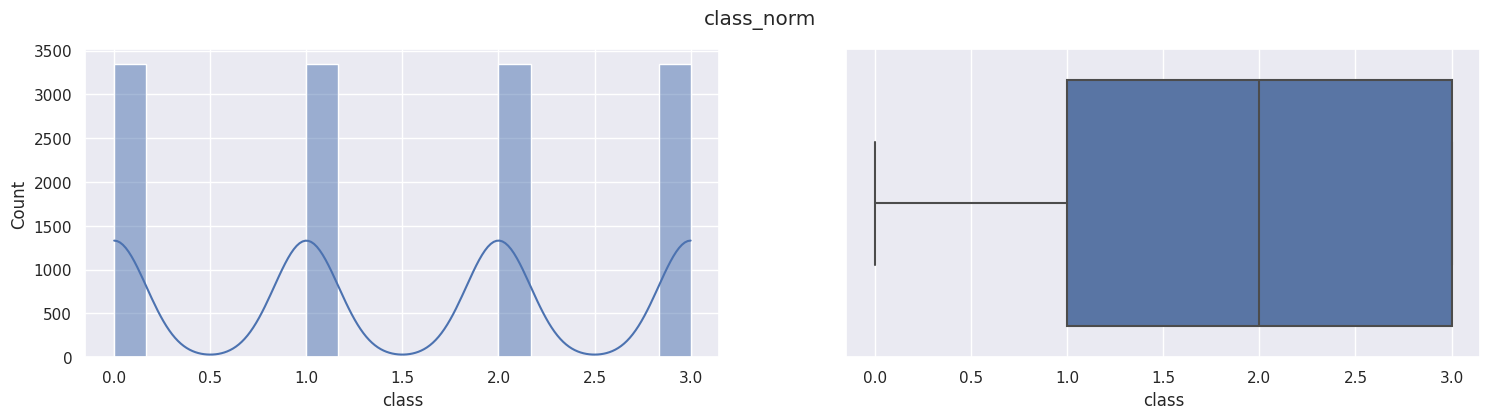

In [12]:
for column in data_norm.columns.tolist():
    eda.plot_distribution(data_norm, column, figures_path=FIGURES_PATH, sufix="norm")
    

## What do we know about the classes? are they balanced?

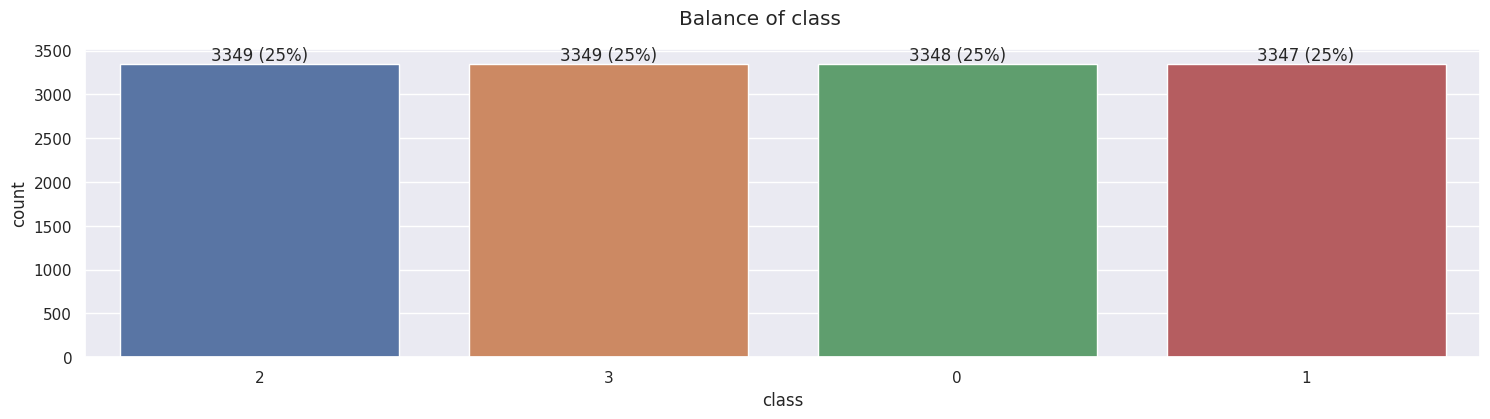

In [13]:
eda.plot_count(data, "class", figures_path=FIGURES_PATH)


_R: The total number of instances per class varies by 1 or 2 instances, so it could be considered that they are balanced_

# Dimensionality reduction: Principal component analysis (PCA)

The attributes and the objective variable must be segmented

In [14]:
X = data_norm.drop(columns=["class"])
Y = data_norm['class'].to_numpy()


## Obtaining the most relevant attributes

In [15]:
pca_features = dimensionality_reduction.pca_features(X, normalize_data=False)
pca_features


,relevance
age,45.201545
gender,19.945752
height_cm,13.057954
weight_kg,7.159068
body_fat_pct,4.281306
broad_jump_cm,3.398194
sit_ups_counts,2.788807
sit_and_bend_forward_cm,2.012700
grip_force,1.147991
systolic,0.639009


In [16]:
relevant_features = pca_features.iloc[:4].index.tolist()
X_relevant = X[relevant_features]
print(f"Total gain: {pca_features.loc[relevant_features].sum(axis=0)[0]:.2f}%")
X_relevant.head(10)


Total gain: 85.36%


,age,gender,height_cm,weight_kg
0,0.139535,1,0.443873,0.652150
1,0.093023,1,-0.422465,-0.974734
2,0.232558,1,1.310211,0.883127
3,0.255814,1,0.704961,0.305684
4,0.162791,1,0.621888,0.021147
5,0.348837,0,-0.374995,-1.008209
6,0.488372,0,-0.481804,-0.313603
7,0.279070,1,0.752432,0.816177
8,0.767442,1,-0.208848,0.004409
9,0.162791,1,1.951065,1.435465


Using the 'age', 'gender', 'height_cm' and 'weight_cm' features yields a gain of 85%

## Obtaining subspace of principal components

In [17]:
X_pca = dimensionality_reduction.pca(X, 2, normalize_data=False)
X_pca.head(10)


,PC1,PC2
0,2.216666,0.437671
1,0.653010,1.348408
2,2.081523,-1.615139
3,1.790092,0.014114
4,1.191661,1.429019
5,-2.085863,1.242047
6,-2.259175,-1.384257
7,1.240391,-1.332304
8,-0.119634,-2.072823
9,3.752017,-0.844322


Convert X variables to numpy arrays

In [18]:
X = X.to_numpy()
X_relevant = X_relevant.to_numpy()
X_pca = X_pca.to_numpy()


# Target variable visualization

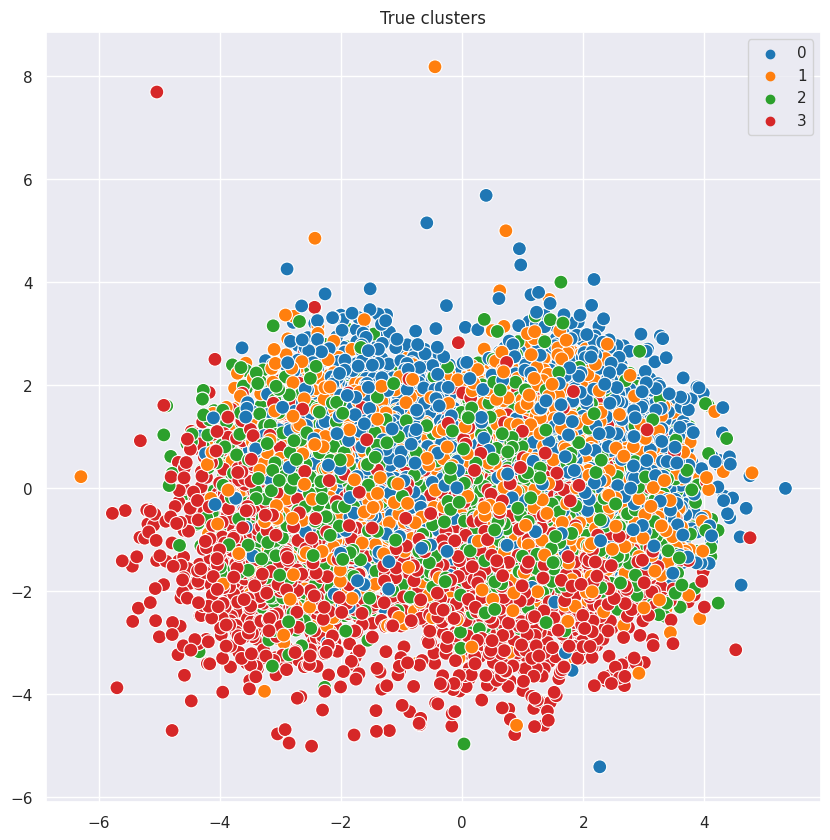

In [19]:
visualization.plot_clustering_result(X_pca, Y, title="True clusters", filename=FIGURES_PATH + "true_clusters")


# Clustering

## K-means example

 56%|█████▌    | 28/50 [00:00<00:00, 480.41it/s]


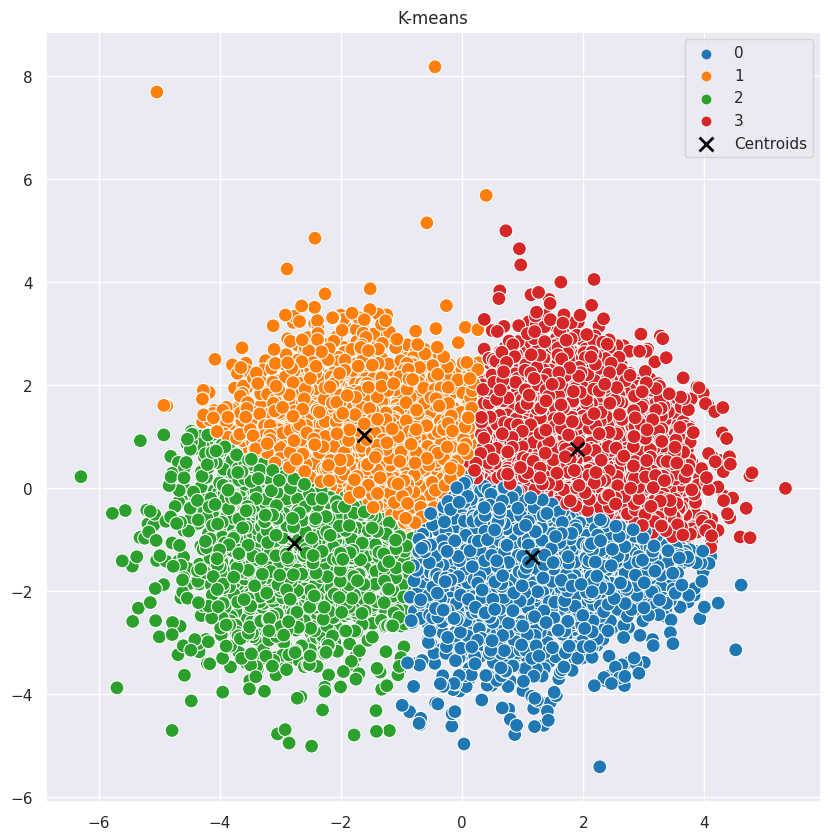

In [20]:
Y_predict, centroids = clustering.k_means(X_pca, 4, max_iter=50, tol=1e-3)
visualization.plot_clustering_result(X_pca, Y_predict, centroids=centroids, title="K-means", filename=FIGURES_PATH + "k_means")


## Affinity propagation example

/mnt/Datos/.enviroments/ubu20/ML-E1/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


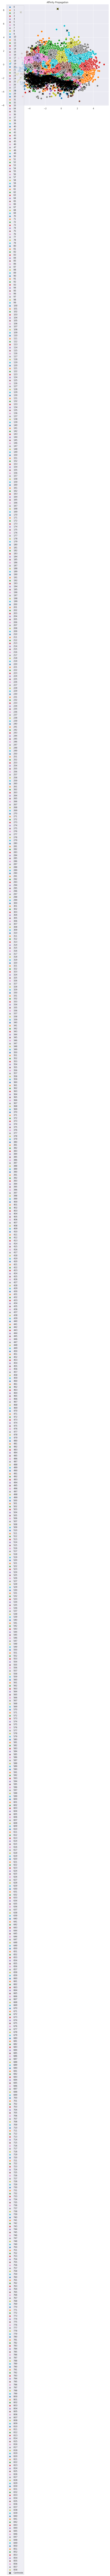

In [22]:
Y_predict, centroids = clustering.affinity_propagation(X_pca, damping=0.5, max_iter=10)
visualization.plot_clustering_result(X_pca, Y_predict, centroids=centroids, title="Affinity Propagation", filename=FIGURES_PATH + "affinity")
